In [1]:
!pip install git+https://github.com/google/lightweight_mmm.git

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?



  Cloning https://github.com/google/lightweight_mmm.git to c:\users\joshi.aayush\appdata\local\temp\pip-req-build-45hrcbvn


In [7]:
pip install jax

In [8]:
pip install numpyro



   ---------------------------------------- 0.0/356.1 kB ? eta -:--:--
   ------------------------ --------------- 215.0/356.1 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------  348.2/356.1 kB 7.2 MB/s eta 0:00:01
   ---------------------------------------  348.2/356.1 kB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 356.1/356.1 kB 2.2 MB/s eta 0:00:00


In [9]:
import jax.numpy as jnp
import numpyro
import pandas as pd

In [11]:
pip install lightweight_mmm


     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.6 kB ? eta -:--:--
     -------------------------------------- 48.6/48.6 kB 618.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/105.2 kB ? eta -:--:--
   -------------------------------------- - 102.4/105.2 kB ? eta -:--:--
   -------------------------------------- - 102.4/105.2 kB ? eta -:--:--
   -------------------------------------- - 102.4/105.2 kB ? eta -:--:--
   -------------------------------------- 105.2/105.2 kB 608.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.2 MB 26.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.2 MB 16.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.2 MB 16.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.2 MB 16.4 MB/s eta 0:00:01
   ----- ------------------

  You can safely remove it manually.


In [12]:
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [13]:
excel_file="C:\\Users\\Joshi.Aayush\\Downloads\\100points_mmm.xlsx"
df=pd.read_excel(excel_file)
df.head()

,date,Sales (Units),1to1_email,IM,Mass_email,GDM & Webinar,Edetail
0,2023-01-01,149154.0,1233.0,0.0,0.0,3344.0,5141.0
1,2023-02-01,222218.0,1598.0,0.0,0.0,3080.0,4575.0
2,2023-03-01,244201.0,1450.0,0.0,0.0,3694.0,4957.0
3,2023-04-01,126199.0,1987.0,0.0,0.0,2401.0,3294.0
4,2023-05-01,187478.0,2135.0,0.0,375.0,4242.0,5737.0


In [14]:
media_data = df[['1to1_email','IM','Mass_email','GDM & Webinar','Edetail']].to_numpy()
target = df[['Sales (Units)']].to_numpy()
costs = df[['1to1_email','IM','Mass_email','GDM & Webinar','Edetail']].sum().to_numpy()

In [15]:
data_size = media_data.shape[0]
data_size

100

In [16]:
# Split and scale data.
split_point = data_size - 20
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Target
target_train = target[:split_point].reshape(-1)

In [17]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs2 = cost_scaler.fit_transform(costs)

In [18]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [19]:
number_warmup=3000
number_samples=3000

In [20]:
mmm.fit(
    media=media_data_train,
    media_prior=costs2,
    target=target_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    number_chains=1,
    )

TypeError: where() got some positional-only arguments passed as keyword arguments: 'condition, x, y'

In [21]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.44      0.29      0.41      0.00      0.86   2002.63      1.00
ad_effect_retention_rate[1]      0.56      0.26      0.62      0.14      0.94    885.84      1.00
ad_effect_retention_rate[2]      0.09      0.08      0.07      0.00      0.19   1950.11      1.00
ad_effect_retention_rate[3]      0.43      0.27      0.41      0.00      0.83   1705.41      1.00
ad_effect_retention_rate[4]      0.41      0.27      0.38      0.00      0.80   1611.97      1.00
              coef_media[0]      0.12      0.11      0.08      0.00      0.29   1160.16      1.00
              coef_media[1]      0.22      0.08      0.21      0.10      0.34    828.23      1.00
              coef_media[2]      0.24      0.06      0.23      0.14      0.32    908.41      1.00
              coef_media[3]      0.17      0.14      0.14      0.00      0.38   1716.39      1.00
              coef_

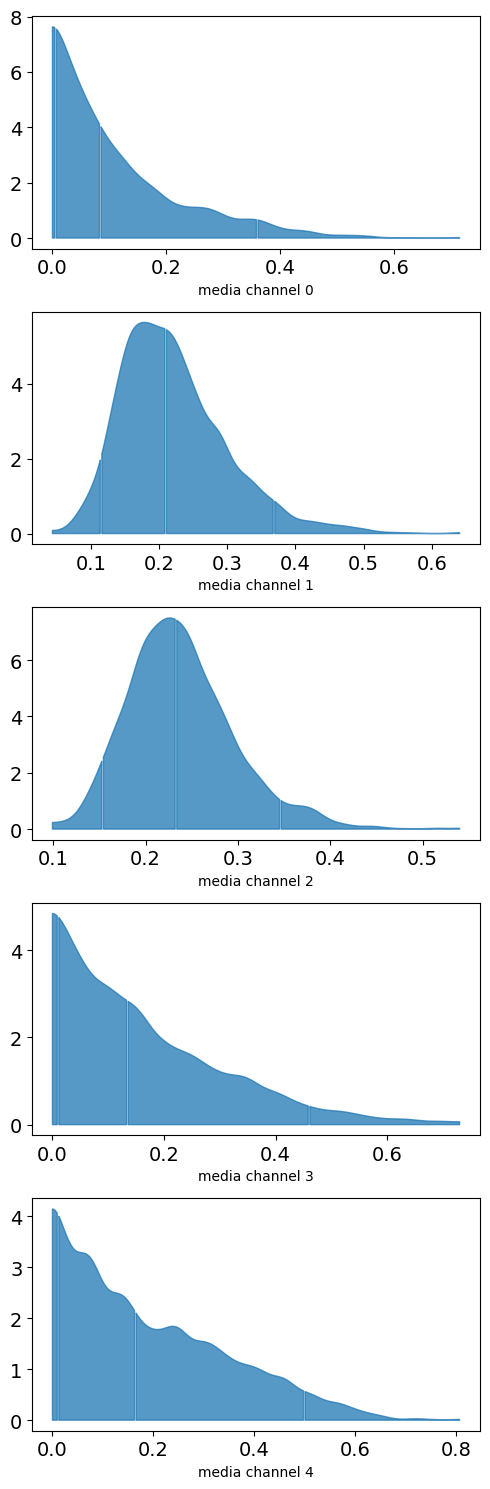

In [22]:
plot.plot_media_channel_posteriors(media_mix_model=mmm)

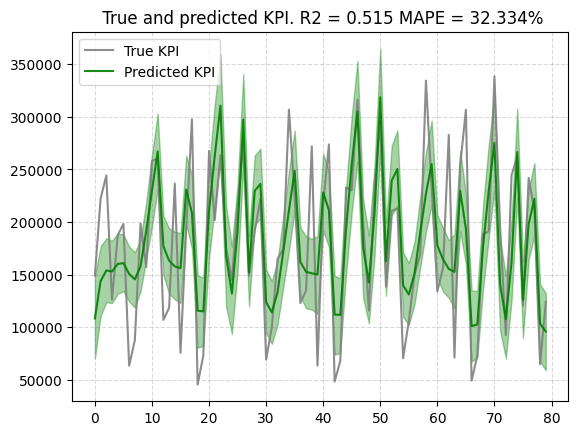

In [23]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [24]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test))
new_predictions.shape

(3000, 20)

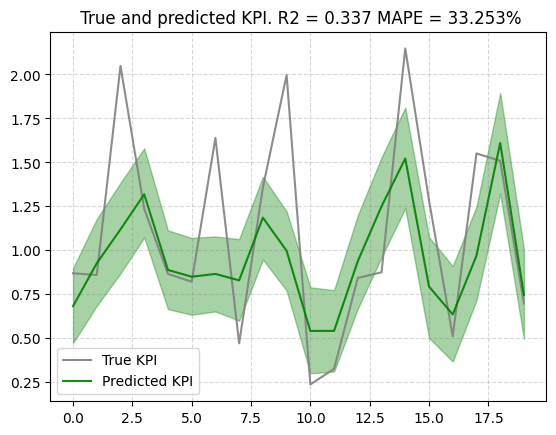

In [25]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

In [26]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

In [27]:
from matplotlib import pyplot as plt
import numpy as np

def custom_plot_media_baseline_contribution_area_plot(
        media_mix_model,
        target_scaler=None,
        channel_names=None,
        fig_size = (20, 7)):
      """Plots an area chart to visualize weekly media & baseline contribution.

      Args:
        media_mix_model: Media mix model.
        target_scaler: Scaler used for scaling the target.
        channel_names: Names of media channels.
        fig_size: Size of the figure to plot as used by matplotlib.

      Returns:
        Stacked area chart of weekly baseline & media contribution.
      """
      # Create media channels & baseline contribution dataframe.
      contribution_df = plot.create_media_baseline_contribution_df(
          media_mix_model=media_mix_model,
          target_scaler=target_scaler,
          channel_names=channel_names)
      contribution_df = contribution_df.clip(0)

      # Create contribution dataframe for the plot.
      contribution_columns = [
          col for col in contribution_df.columns if "contribution" in col
      ]
      contribution_df_for_plot = contribution_df.loc[:, contribution_columns]
      contribution_df_for_plot = contribution_df_for_plot[
          contribution_df_for_plot.columns[::-1]]
      period = np.arange(1, contribution_df_for_plot.shape[0] + 1)
      contribution_df_for_plot.loc[:, "period"] = period

      # Plot the stacked area chart.
      fig, ax = plt.subplots()
      contribution_df_for_plot.plot.area(
          x="period", stacked=True, figsize=fig_size, ax=ax)
      ax.set_title("Attribution Over Time", fontsize="x-large")
      ax.tick_params(axis="y")
      ax.set_ylabel("Baseline & Media Chanels Attribution")
      ax.set_xlabel("Period")
      ax.set_xlim(1, contribution_df_for_plot["period"].max())
      ax.set_xticks(contribution_df_for_plot["period"])
      ax.set_xticklabels(contribution_df_for_plot["period"])
      for tick in ax.get_xticklabels():
        tick.set_rotation(45)
      plt.close()
      return fig

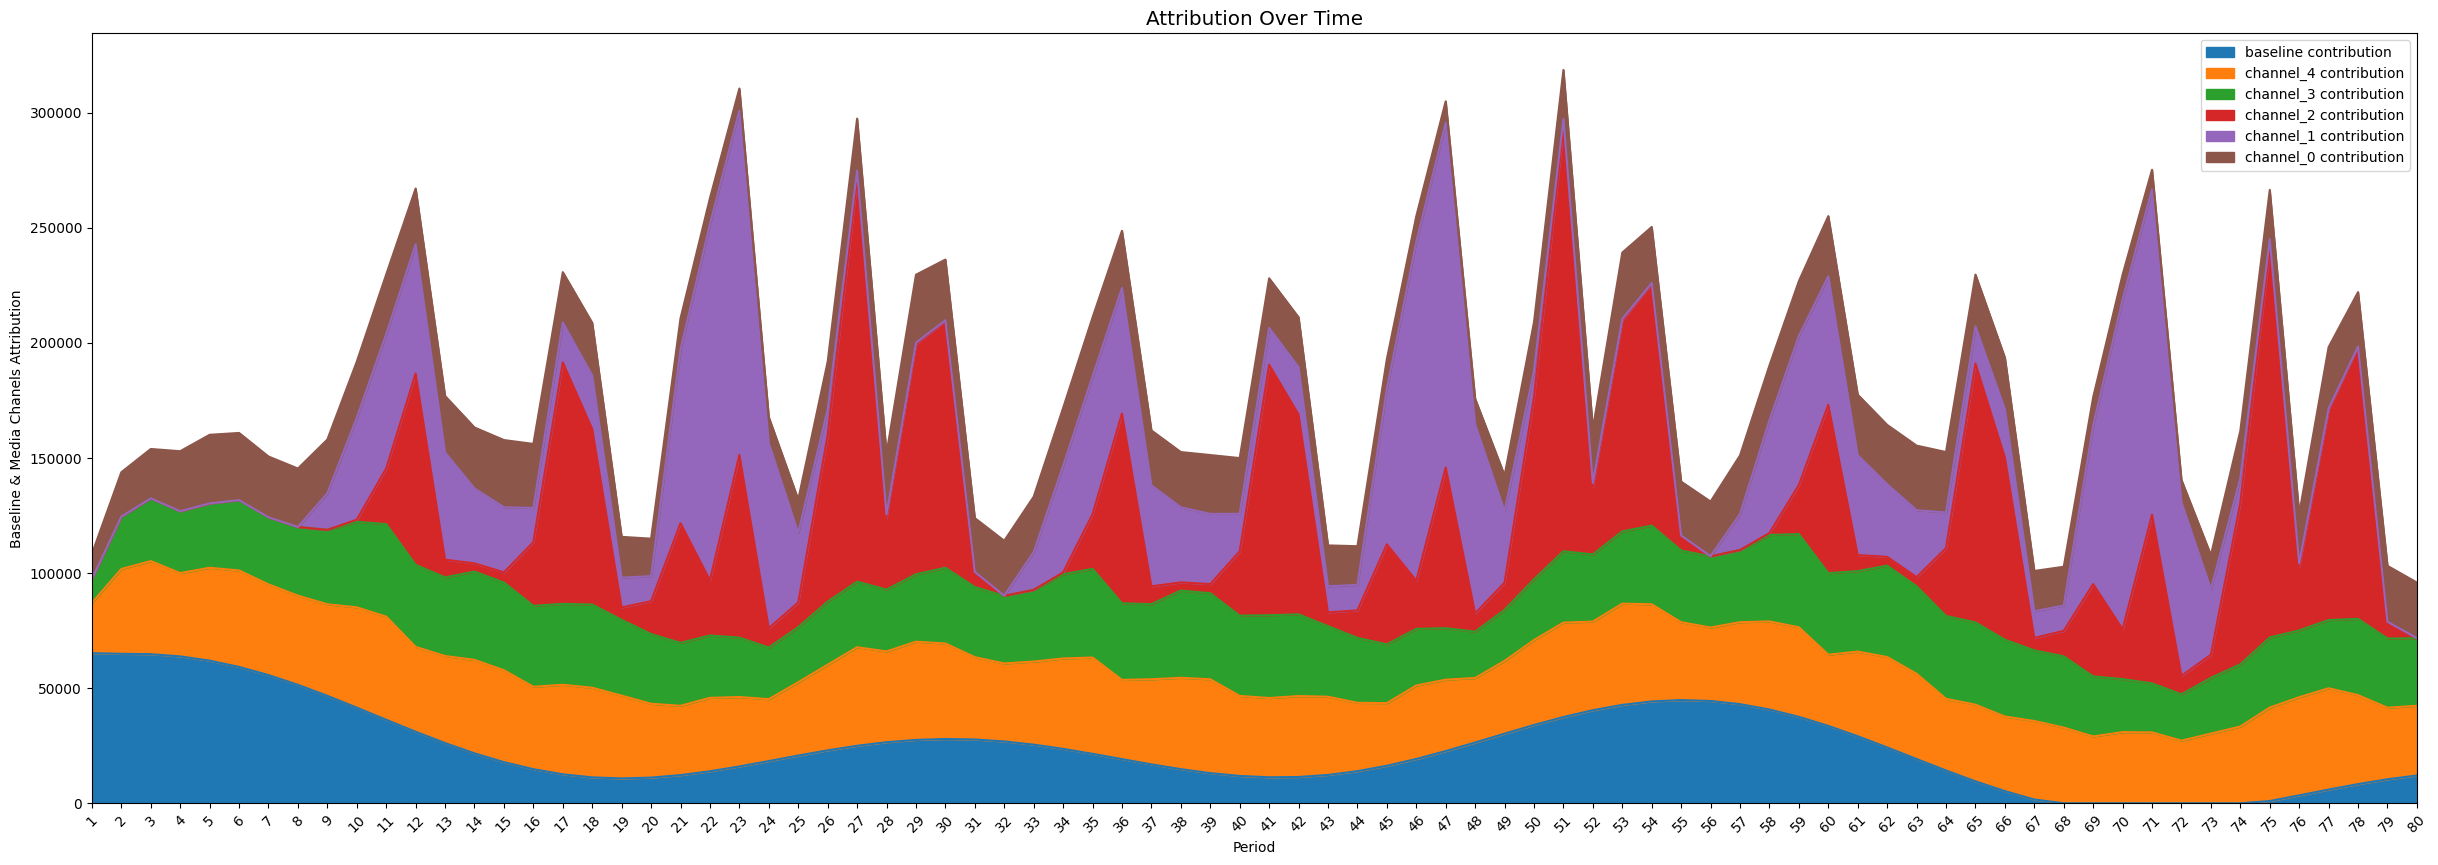

In [28]:
custom_plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

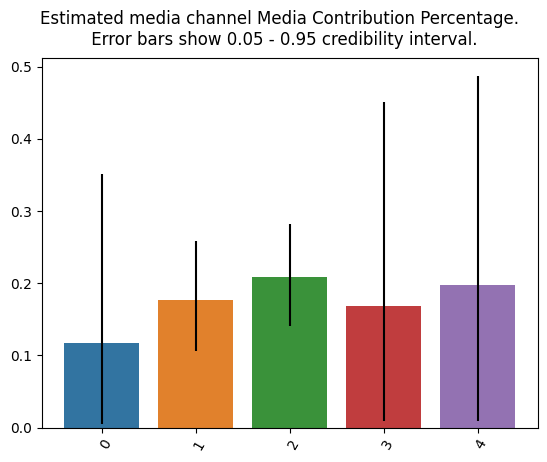

In [29]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage")

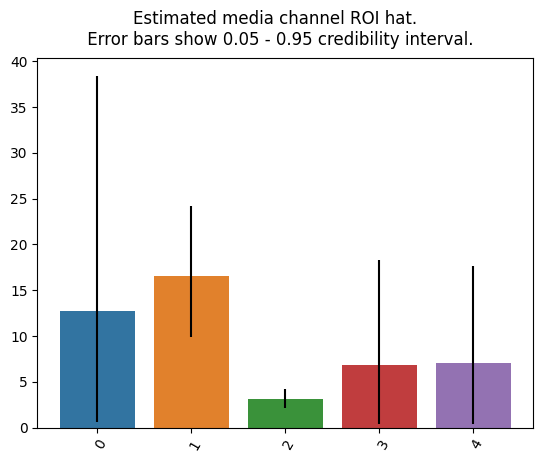

In [30]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat")

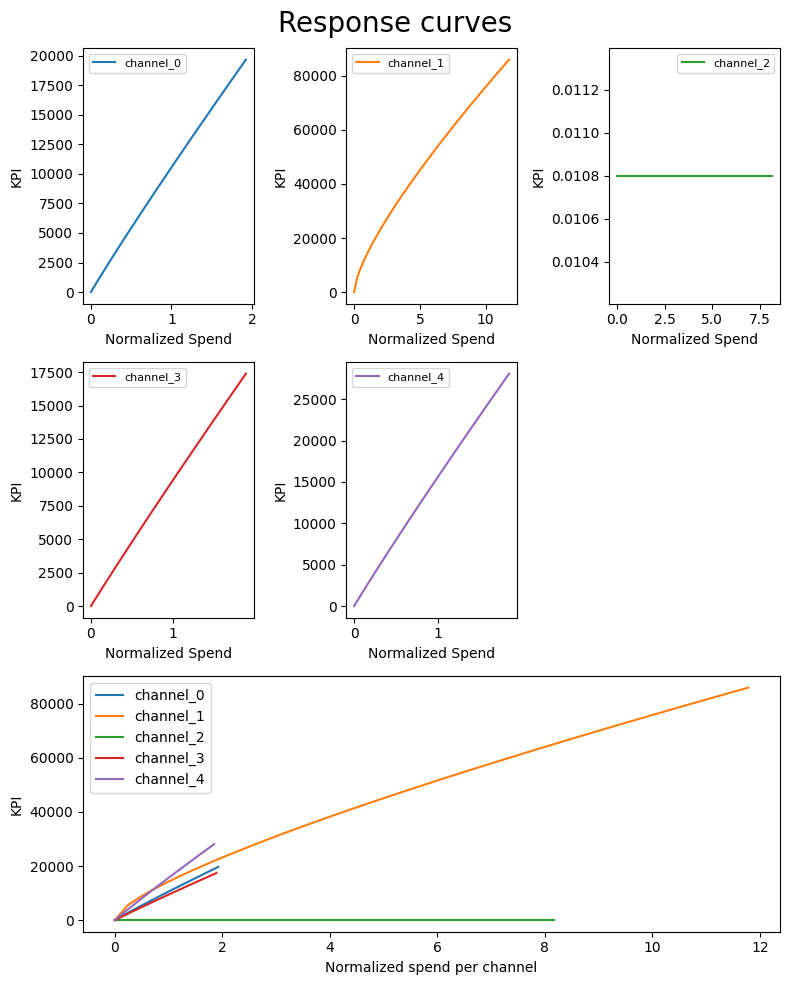

In [31]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler)

In [32]:
prices = jnp.ones(mmm.n_media_channels)

In [33]:
n_time_periods = 5
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [34]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_budget_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -857581.5687360592
            Iterations: 21
            Function evaluations: 221
            Gradient evaluations: 20


In [35]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([ 8137.491,  8759.182, 37877.26 , 21391.555, 24419.371], dtype=float32)

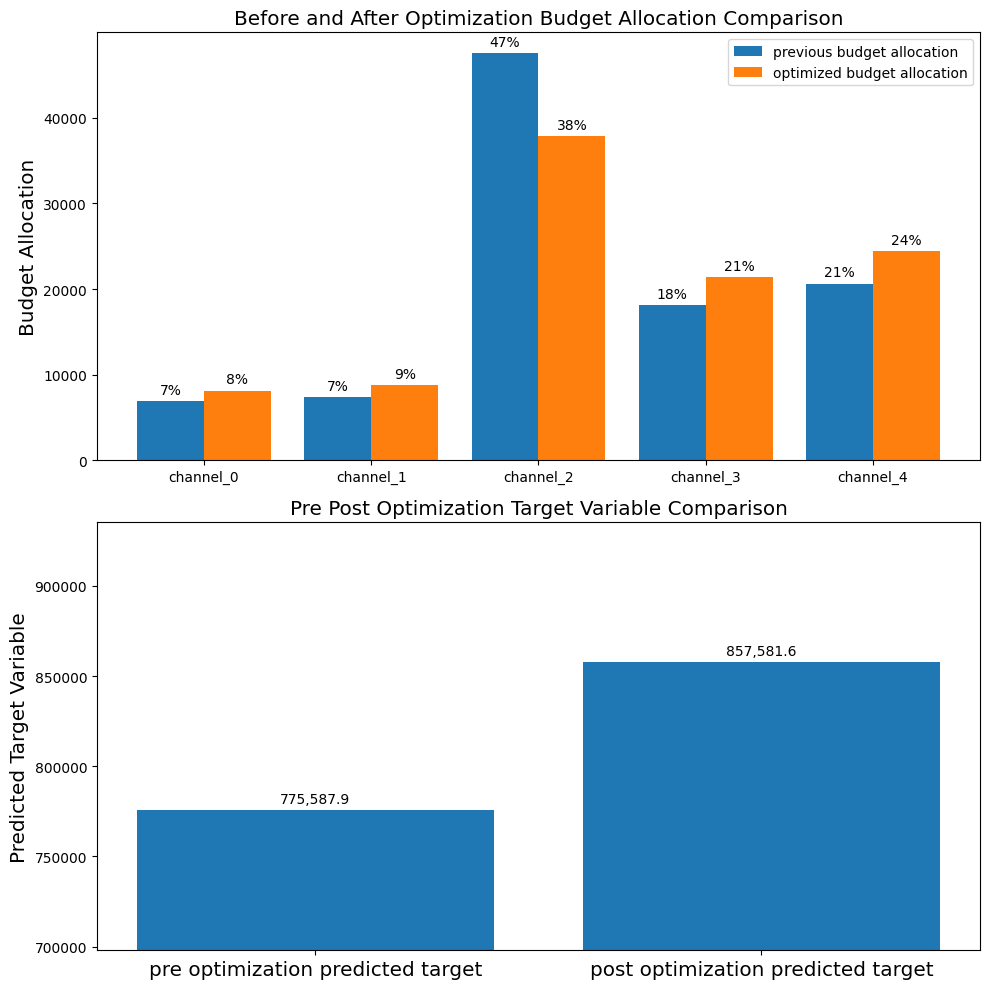

In [36]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10))

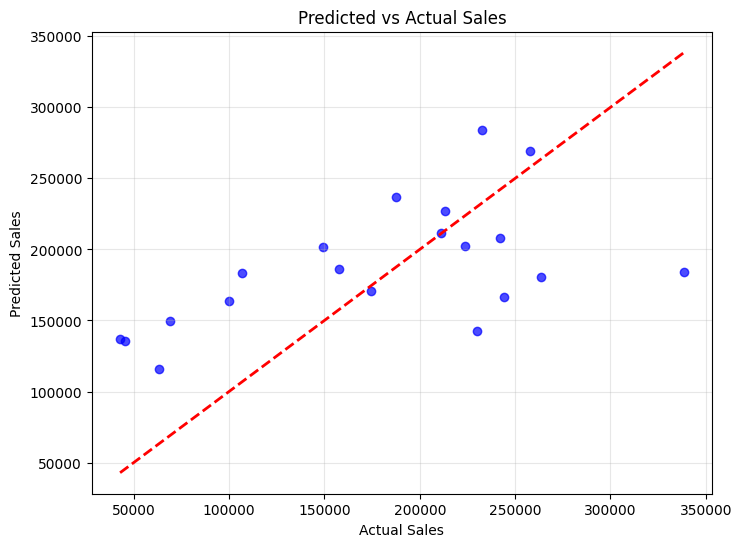

C:\Users\tabas\AppData\Roaming\Python\Python311\site-packages\seaborn\_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


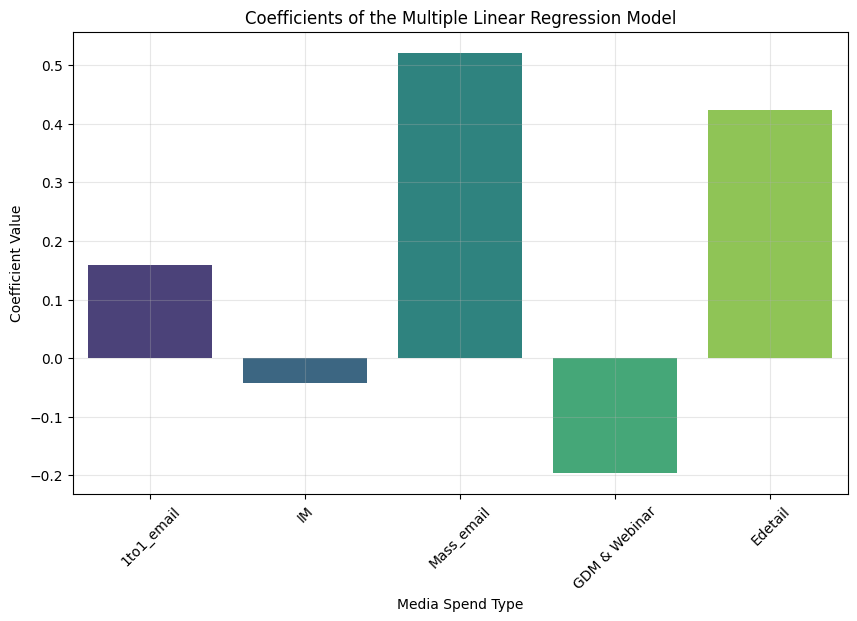

In [48]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and target
media_data = df[['1to1_email', 'IM', 'Mass_email', 'GDM & Webinar', 'Edetail']].to_numpy()
target = df[['Sales (Units)']].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(media_data, target, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Predict using the test set
y_pred_scaled = model.predict(X_test_scaled)

# Reverse scaling for predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Reverse scaling for actual test targets
y_test = scaler_y.inverse_transform(y_test_scaled)

# Visualization 1: Predicted vs Actual Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(alpha=0.3)
plt.show()

# Visualization 2: Coefficients of the Model
coefficients = model.coef_.flatten()
media_columns = ['1to1_email', 'IM', 'Mass_email', 'GDM & Webinar', 'Edetail']

plt.figure(figsize=(10, 6))
sns.barplot(x=media_columns, y=coefficients, palette='viridis')
plt.title('Coefficients of the Multiple Linear Regression Model')
plt.xlabel('Media Spend Type')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()
